## &nbsp;&nbsp;Geospatial Data Science and Analysis
### &nbsp;&nbsp;&nbsp;using ArcGIS API for Python
<br/>
<br/>


###  &nbsp;&nbsp;                Rohit Singh  - rsingh@esri.com
 <img src="images/ScienceOfWhere2.PNG"/>


# ArcGIS API for Python

<img src="images/arcgis-python-api.png"/>

* Python library for spatial analysis, mapping and GIS

* Powerful, modern and easy to use

* Powered by Web GIS

# ArcGIS + Jupyter = ❤ 
![](images/jupyter-notebook.png)

# API Overview
## Pythonic platform for geospatial analysis
<img src="images/api-overview.png" />

# It all starts with your GIS

In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS('https://deldev.maps.arcgis.com', 'demo_deldev', 'P@ssword123')

In [3]:
enterprise = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

# Search for content

In [4]:
items = gis.content.search('San Diego')

<Item title:"Places to see in San Diego" type:Feature Collection owner:deldev>
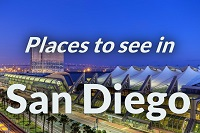

<Item title:"San Diego attractions web map" type:Web Map owner:deldev>
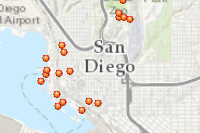

<Item title:"San Diego Trolley stations" type:Feature Collection owner:deldev>
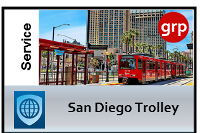

In [5]:
for item in items:
    display(item)

In [6]:
trolley_stations = items[0]
sd_attractions = items[2]

# Visualize layers on map widget

In [7]:
sdmap = gis.map('San Diego', zoomlevel=14)
sdmap

In [8]:
sdmap.add_layer(sd_attractions)

In [9]:
sdmap.add_layer(trolley_stations)

<img src='images/SpatialAnalysis.png'/>

## Which attractions are near trolley stations?

In [10]:
arcgis.env.active_gis = gis

In [11]:
from arcgis.features.use_proximity import create_buffers
from arcgis.features.manage_data import overlay_layers

In [12]:
places_to_see = overlay_layers(input_layer=sd_attractions,
                               overlay_layer=create_buffers(trolley_stations,
                                                        [0.5], units='Miles'))

In [13]:
my_map = gis.map('San Diego', zoomlevel=14)
display(my_map)
my_map.add_layer(places_to_see)

## Analysis results as a table

In [14]:
df = places_to_see.query().df
df = df[['NAME', 'Title']]
df

,NAME,Title
0,Welcome to San Diego!,COUNTY CENTER/LITTLE ITALY TROLLEY STATION
1,Welcome to San Diego!,CIVIC CENTER TROLLEY STATION
2,Welcome to San Diego!,FIFTH AVENUE TROLLEY STATION
3,Welcome to San Diego!,AMERICA PLAZA TROLLEY STATION
4,Welcome to San Diego!,SANTA FE DEPOT
5,Welcome to San Diego!,SEAPORT VILLAGE TROLLEY STATION
6,Gaslamp Quarter,12TH AND MARKET TROLLEY STATION
7,Convention Center skywalk and stairs,CONVENTION CENTER TROLLEY STATION
8,Convention Center skywalk and stairs,GASLAMP QUARTER TROLLEY STATION
9,Gaslamp Quarter,12TH AND IMPERIAL TRANSIT CENTER


# Feature data and analysis

<Item title:"USA Counties" type:Feature Layer Collection owner:esri_dm>
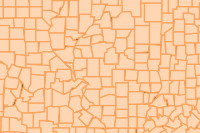

In [15]:
counties_item = gis.content.search('USA Counties', 'Feature Layer', 
                                   outside_org=True)[5]
counties_item

In [16]:
counties = counties_item.layers[0]

In [17]:
ca_counties = counties.query(where="STATE_NAME='California'")

## Spatial dataframe

In [18]:
counties_df = ca_counties.df
counties_df

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP10_SQMI,POP12_SQMI,POP2010,POP2012,RENTER_OCC,SQMI,STATE_NAME,VACANT,WHITE,SHAPE
0,68473,72493,65339,122046,108500,108479,77285,68694,43502,23473,...,102.9,104.282870,839631,851089,101782,8161.35,California,29757,499766,"{'rings': [[[-13119789.4732166, 4272899.442060..."
1,11324,11356,13158,25589,21878,20282,12924,11564,6844,3809,...,109.9,111.427421,152982,155039,18904,1391.39,California,2634,83027,"{'rings': [[[-13342775.4280577, 4356085.351079..."
2,3888,4190,3362,6603,7095,10255,10625,3574,6553,3502,...,48.6,49.082334,64665,65253,9076,1329.46,California,8944,52033,"{'rings': [[[-13667224.3154792, 4696180.986610..."
3,1853,2107,2831,6337,5513,5447,4113,1595,1984,1041,...,7.4,7.422856,34895,35039,3468,4720.42,California,2652,25532,"{'rings': [[[-13418482.3589672, 5039533.376017..."
4,678845,753630,752788,1475731,1430326,1368947,1013156,633690,568470,345603,...,2402.3,2423.264150,9818605,9904341,1696455,4087.19,California,203872,4936599,"{'rings': [[[-13149469.25, 3995666.625], [-131..."
5,11755,12224,11032,20562,19167,19291,15833,11756,9868,5468,...,70.1,71.065672,150865,153025,15591,2153.29,California,5823,94456,"{'rings': [[[-13337486.1875, 4418437.5625], [-..."
6,14241,12798,10308,24836,36478,42055,40088,15481,23211,12425,...,480.2,486.100489,252409,255509,38573,525.63,California,8004,201963,"{'rings': [[[-13691681.78125, 4611910], [-1369..."
7,987,1026,827,1651,1828,3232,3283,821,2253,1186,...,12.5,12.613887,18251,18455,2466,1463.07,California,2495,16103,"{'rings': [[[-13364133.625, 4464660.5], [-1336..."
8,5390,5613,4874,10704,10268,12476,14417,5259,7556,3983,...,25.0,25.083070,87841,88094,14344,3512.09,California,5378,67218,"{'rings': [[[-13752510.6332503, 4689126.202854..."
9,22115,24451,20195,35060,31967,31007,22645,22167,13205,7717,...,129.4,129.897434,255793,256841,34446,1977.26,California,8056,148381,"{'rings': [[[-13401606.6535612, 4527640.672262..."


### Pandorable (attribute and spatial) selections

In [19]:
sd_county = counties_df[counties_df.NAME == 'San Diego']

In [20]:
# Attribute query
sd_county.POP2012.iloc[0]

3137431

In [21]:
# query the shape of San Diego county and set it's spatial reference
sd_geom = sd_county.SHAPE.iloc[0]
sd_geom.spatial_reference = counties.container.properties.spatialReference

In [22]:
m = gis.map('San Diego', zoomlevel=7)
m.draw(sd_geom)
m

## Exploratory data analysis

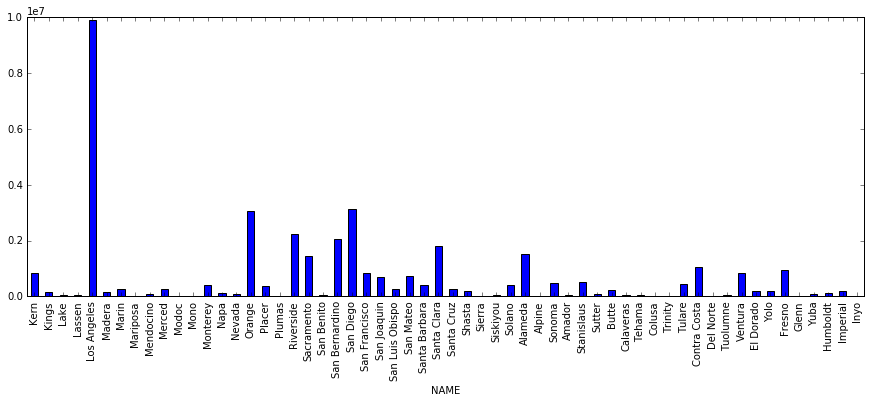

In [23]:
%matplotlib inline
plotdf = counties_df.set_index('NAME')
plotdf.POP2012.plot(kind='bar', x='NAME', figsize=(15,5))

# Smart Mapping

In [24]:
ca_map = gis.map("California")
ca_map

In [25]:
ca_map.add_layer(counties, {
                             "definition_expression": "STATE_NAME='California'",
                             "renderer": "ClassedColorRenderer",
                             "field_name": "POP2012"
                            })

<img src="images/chennai.png"/>

## Big-data analysis (GeoAnalytics)
<img src="images/GeoAnalytics.png"/>

# Analyse crimes in Houston, TX
<img src="images/hpd.png" width="750"/>

In [26]:
houston_gis = GIS('https://dev003246.esri.com/portal', USERNAME, PASSWORD, verify_cert=False)

# Attach data

In [27]:
datastores = arcgis.geoanalytics.get_datastores()
datastores.add_bigdata('Houston_crime_yearly', 
                       r'\\teton\atma_shared\datasets\HoustonCrime')

Big Data file share exists for Houston_crime_yearly


<Datastore title:"/bigDataFileShares/Houston_crime_yearly" type:"bigDataFileShare">

In [28]:
houston_yearly = houston_gis.content.search('Houston_crime_yearly',
                                            'big data file share')[0]
houston_yearly

<Item title:"bigDataFileShares_Houston_crime_yearly" type:Big Data File Share owner:admin>

In [29]:
houston_yearly = houston_gis.content.search('Houston_crime_yearly',
                                            'big data file share')[0]

In [30]:
houston_yearly.layers

[<Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2010">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2011">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2012">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2013">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2014">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataStoreCatalogs/bigDataFileShares_Houston_crime_yearly/BigDataCatalogServer/houstoncrime2015">,
 <Layer url:"https://dev003247.esri.com/gax/rest/services/DataSt

# Invoke batch analytics

In [31]:
from ipywidgets import *
from arcgis.geoanalytics.analyze_patterns import find_hot_spots
arcgis.env.process_spatial_reference=32611
arcgis.env.verbose = False
houston = arcgis.geocoding.geocode('Houston, TX')[0]

In [ ]:
for category in df.Category.unique()[:-1]: 
    lyrid = 0
    for year in range(2010, 2017):
        output_name='Houston_' + category.replace(' ', '_') + '_Hotspot_' + str(year)
        print('Generating ' + output_name)
        layer = houston_yearly.layers[lyrid]
        layer.filter = "Category='{}'".format(category)
        
        find_hot_spots(layer, bin_size=0.5, bin_size_unit='Miles', 
                       neighborhood_distance=1, neighborhood_distance_unit='Miles', 
                       output_name=output_name)
        
        lyrid = lyrid + 1

# View results
## Hot Spots across crime categories

In [33]:
hotmap1 = houston_gis.map(houston, 10)
hotmap1.add_layer(houston_gis.content.search('Houston_Burglary_Hotspot_2016')[0])
hotmap2 = houston_gis.map(houston, 10)
hotmap2.add_layer(houston_gis.content.search('Houston_Auto_Theft_Hotspot_2016')[0])

hotmap1.layout=Layout(flex='1 1', padding='3px')
hotmap2.layout=Layout(flex='1 1', padding='3px')

items_layout = Layout(flex='1 1 auto', width='auto')

In [34]:
display(HBox([hotmap1, hotmap2]))
display(HBox(children=[Button(description='Burglary hot spots in 2016', layout=items_layout, button_style='danger'),
                       Button(description='Auto theft hot spots in 2016', layout=items_layout, button_style='danger')],
             layout=Layout(width='100%')))

## Compare Hot Spots over time

In [35]:
maps = []
labels = []
items_layout = Layout(flex='1 1 auto', width='auto')
layout=Layout(height='300px')

In [36]:
for year in range(2014, 2017):
    layer = houston_gis.content.search('Houston_Auto_Theft_Hotspot_' + str(year))[0]
    hotspotmap = houston_gis.map(houston)
    hotspotmap.add_layer(layer)
    hotspotmap.layout=Layout(flex='1 1', padding='3px')
    maps.append(hotspotmap)
    hotspotmap.basemap='gray'
    labels.append(Button(description='Auto theft hot spots in ' + str(year), 
                         layout=items_layout, button_style='danger'))
    
display(HBox([maps[0], maps[1], maps[2]], layout=layout))
display(HBox(children=labels, layout=Layout(width='100%')))

<img src='images/RasterAnalysis.png'/>

# Use Landsat Imagery

In [37]:
landsat_item = gis.content.search('"Landsat Multispectral"', 
                                  'Imagery Layer', outside_org=True)[0]

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
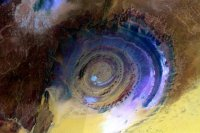

In [38]:
landsat_item

In [39]:
landsat = landsat_item.layers[0]

## Visualize imagery layers

In [40]:
imagery_map = gis.map('San Diego, CA', zoomlevel=12)
imagery_map.add_layer(landsat)
imagery_map

## Code: Plot spectral profile at clicked location

In [41]:
import pandas as pd
pd.DataFrame(landsat.key_properties()['BandProperties'])

,BandIndex,BandName,DatasetTag,WavelengthMax,WavelengthMin
0,0,CoastalAerosol,MS,450,430
1,1,Blue,MS,510,450
2,2,Green,MS,590,530
3,3,Red,MS,670,640
4,4,NearInfrared,MS,880,850
5,5,ShortWaveInfrared_1,MS,1650,1570
6,6,ShortWaveInfrared_2,MS,2290,2110
7,7,Cirrus,MS,1380,1360


In [42]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output

output_notebook()

def handle_click(m, pt):
    m.draw(pt)
    
    samples = landsat.get_samples(pt, pixel_size=30)
    values = samples[0]['value']
    
    x = ['1','2', '3', '4', '5', '6', '7', '8']
    y = [float(int(s)/100000) for s in values.split(' ')]
    
    p = figure(title="Spectral Profile", x_axis_label='Spectral Bands', 
               y_axis_label='Data Values', width=600, height=300)
    p.line(x, y, legend="Selected Point", line_color="red", line_width=2)
    p.circle(x, y, line_color="red", fill_color="white", size=8)
    p.set(y_range=Range1d(0, 1.0))
    
    clear_output()
    show(p)

Loading BokehJS ...

In [43]:
click_map = gis.map('San Diego, CA', zoomlevel=12)
click_map.add_layer(landsat)
click_map.on_click(handle_click)

## Demo: Plot spectral profile at clicked location

In [44]:
click_map

## Dynamic raster processing

In [45]:
dynamic_map = gis.map('San Diego, CA', zoomlevel=12)
dynamic_map.add_layer(landsat)
dynamic_map

In [46]:
from arcgis.raster.functions import *
from IPython.display import clear_output
import time

In [111]:
for rasterfunc in landsat.properties.rasterFunctionInfos:
    clear_output()
    print(rasterfunc.name)
    
    dynamic_map.add_layer(apply(landsat, rasterfunc.name))
    time.sleep(2)

None


### Custom raster processing using Raster Functions

<img src="images/raster-functions2.png"/>

![](images/run.jpg)

<img src="images/map-algebra.png"/>

## Function chain for weighted overlay analysis

<img src="images/rft-woa.png" width="750"/>

## Inputs
### Elevation raster

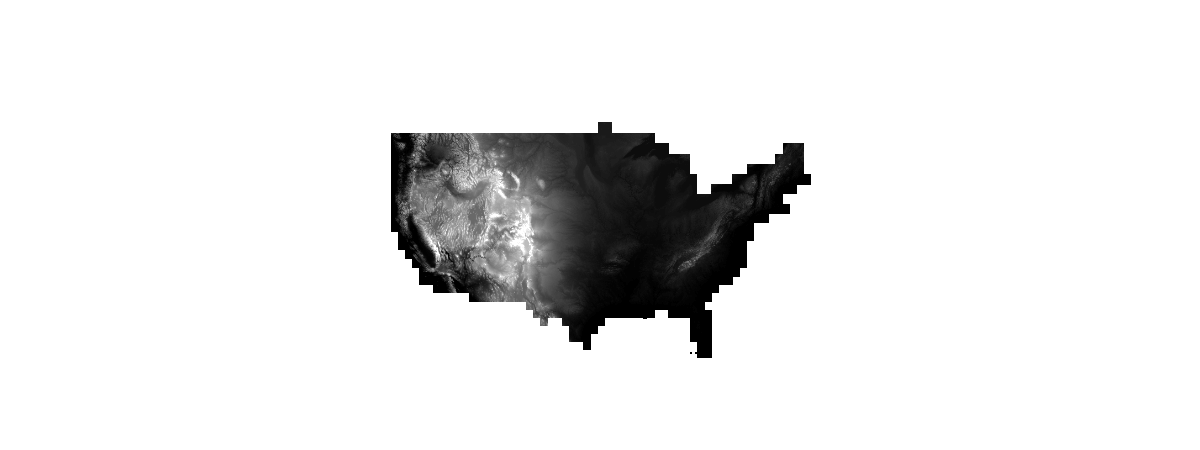

In [48]:
# Digital elevation model for the US

item_dem = enterprise.content.search('elevation_270m')[0]
lyr_dem = item_dem.layers[0]
lyr_dem

### Human modified index

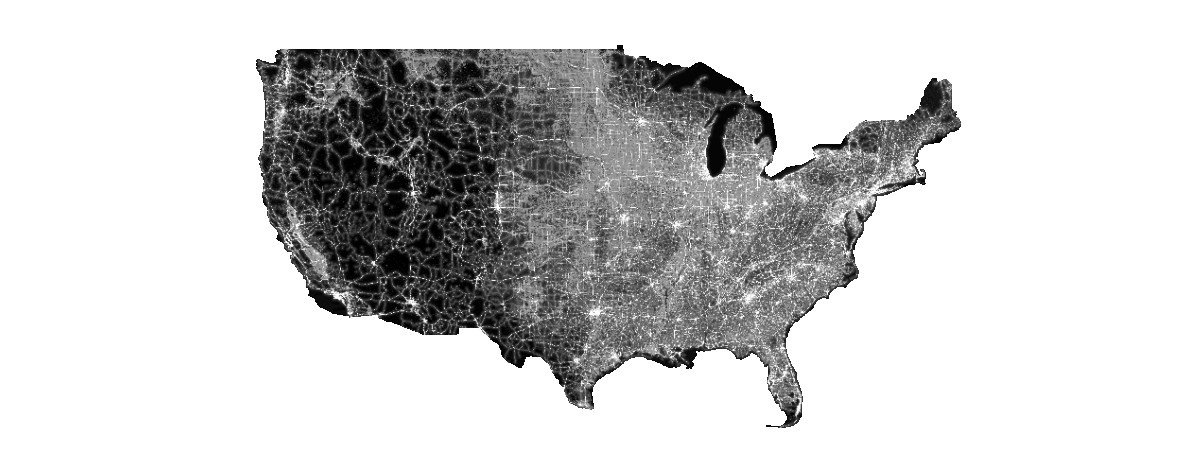

In [49]:
# Human Modified Index imagery layer
# This dataset is based on research on the degree of human modification to
# the landscape, on a scale of 0 - 1, where 0.0 indicates unmodified natural
# landscape and 1.0 indicates the landscape is completely modified by human activity.

item_hmi = enterprise.content.search('human_modification_index')[0]
lyr_hmi = item_hmi.layers[0]
lyr_hmi

## Set area of interest as layer's extent

In [50]:
# geocode the area of interest
from arcgis.geocoding import geocode

sd_county = geocode('San Diego County', 
                    out_sr=lyr_dem.properties.spatialReference)[0]

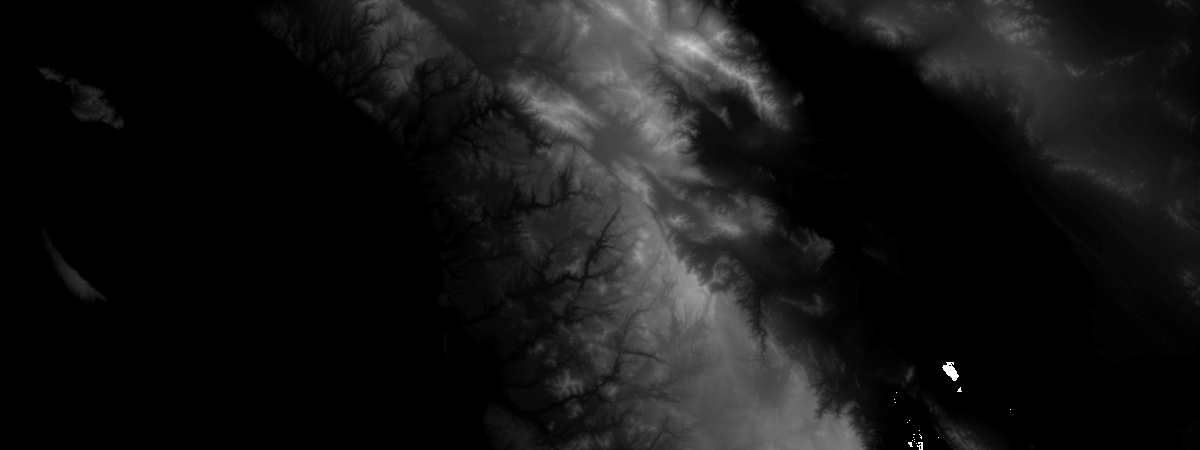

In [51]:
# set the area of interest as the layer's extent
lyr_dem.extent = sd_county['extent']
lyr_dem

### Interactive raster processing in Jupyter Notebook

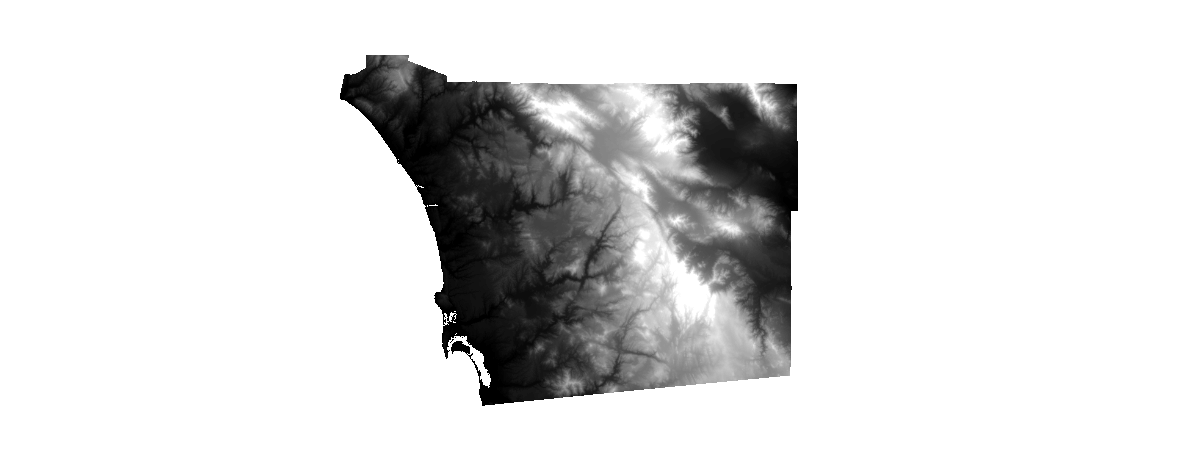

In [52]:
clipped_elev = clip(lyr_dem, sd_geom)
clipped_elev

In [53]:
# Create a colormap for rendering the analysis results.

red_green =  [[1,  38, 115,0],[2,  86, 148,0],[3,  0x8B, 0xB5,0],[4,  0xC5, 0xDB,0],
         [5, 255, 255, 0],[6,  0xFF, 0xC3,0],[7, 0xFA, 0x8E, 0],[8,  0xF2, 0x55,0],
         [9, 0xE6, 0, 0]]

## Chaining raster functions

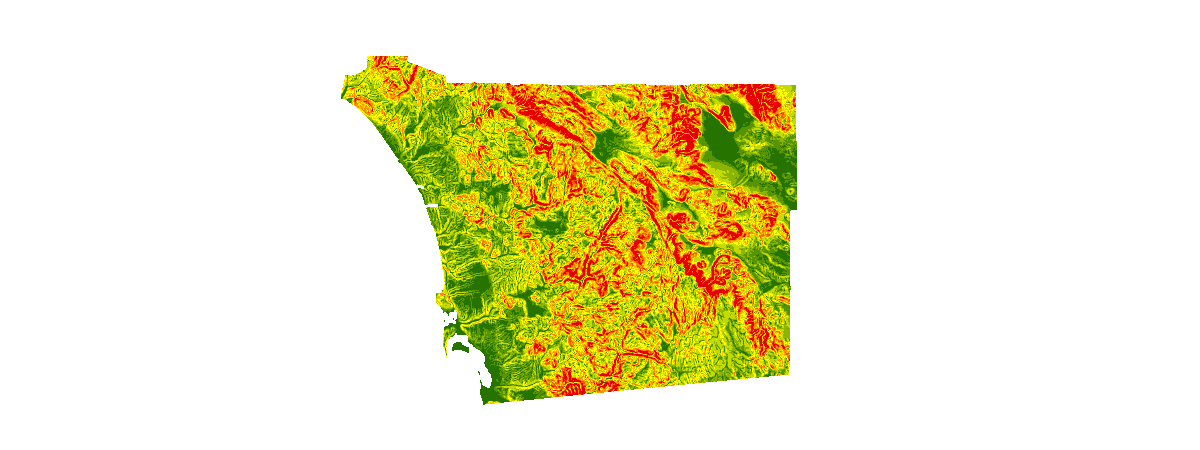

In [54]:
output_values = [1,2,3,4,5,6,7,8,9]

colormap(remap(slope(clipped_elev, 
                     slope_type='DEGREE', 
                     z_factor=1),
               input_ranges=[0,1, 1,2, 2,3, 3,5, 5,7, 7,9, 9,12, 12,15, 15,100],
               output_values=output_values),
         colormap=red_green)

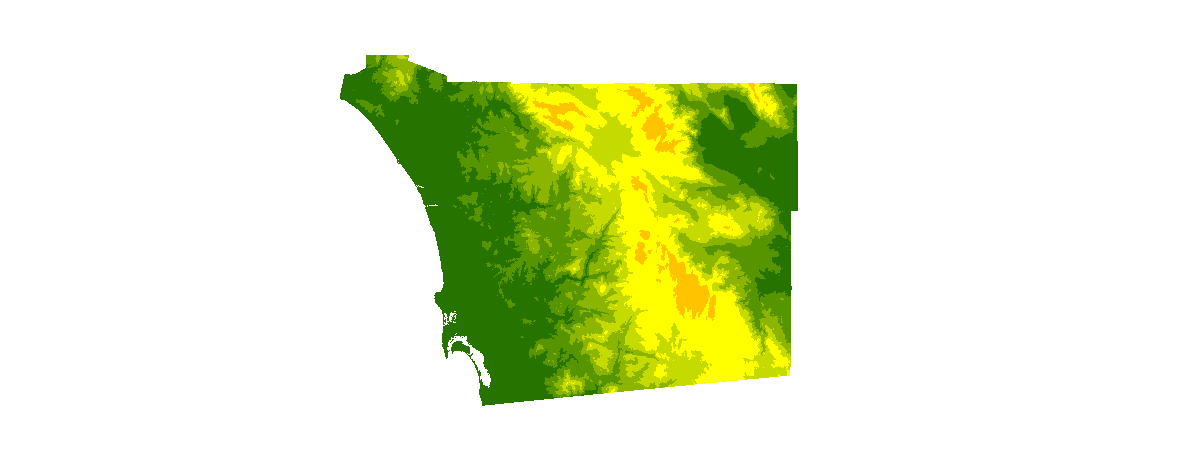

In [55]:
colormap(remap(clip(lyr_dem, sd_geom),  # Elevation 
                    input_ranges=[-90,250, 250,500, 500,750, 750,1000, 1000,1500, 1500,2000, 2000,2500, 2500,3000, 3000,5000],
                    output_values=[1,2,3,4,5,6,7,8,9]) ,
        colormap=red_green)

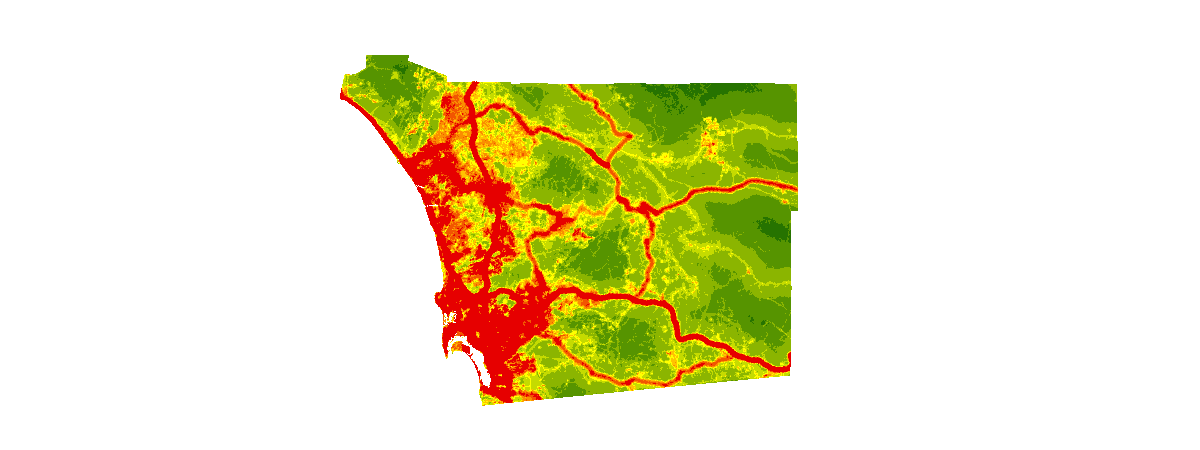

In [56]:
lyr_hmi.extent = sd_county['extent']
colormap(remap(clip(lyr_hmi, sd_geom), # Human modified index 
                     input_ranges=[0.0,0.1, 0.1,0.2, 0.2,0.3, 0.3,0.4, 0.4,0.5,0.5,0.6, 0.6,0.7, 0.7,0.8, 0.8,1.1],
                     output_values=[1,2,3,4,5,6,7,8,9]),
        colormap=red_green)

## Prepare input layers

In [57]:
elevation = remap(lyr_dem,  # Elevation 
                    [-90,250, 250,500, 500,750, 750,1000, 1000,1500, 1500,2000, 2000,2500, 2500,3000, 3000,5000],
                    output_values) 

In [58]:
natural_areas = remap(lyr_hmi, # Human Modified Index 
                     [0.0,0.1, 0.1,0.2, 0.2,0.3, 0.3,0.4, 0.4,0.5,0.5,0.6, 0.6,0.7, 0.7,0.8, 0.8,1.1],
                     output_values)

In [59]:
terrain = remap(slope(lyr_dem, slope_type='DEGREE', z_factor=1), # Slope
                     [0,1, 1,2, 2,3, 3,5, 5,7, 7,9, 9,12, 12,15, 15,100],
                     output_values) 

## Map algebra for Weighted Overlay Analysis

In [60]:
# Map algebra for the web GIS!
result = 0.2*elevation + 0.3*terrain + 0.5*natural_areas

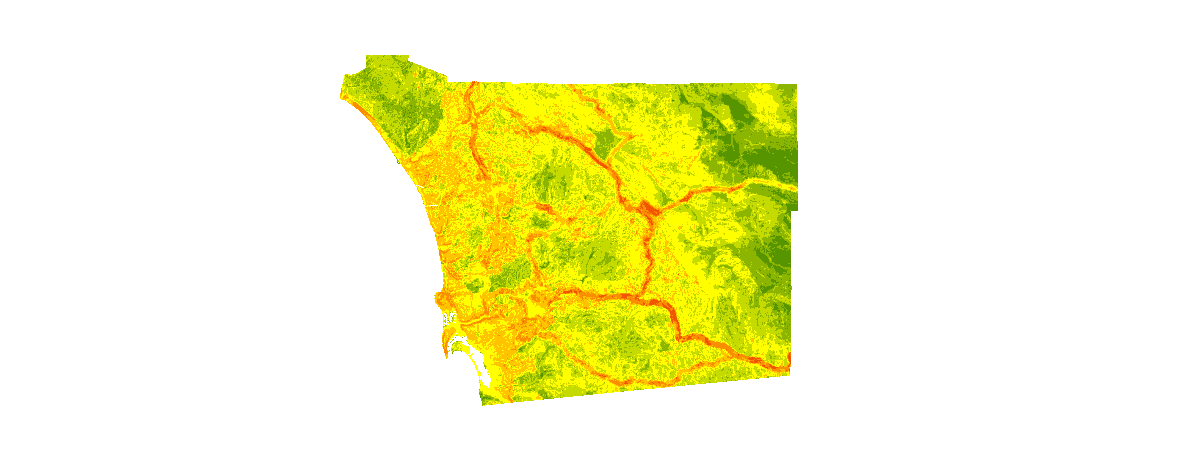

In [61]:
run_raster = colormap(clip(result, sd_geom), colormap=red_green)
run_raster

## Visualize results using map widget

In [62]:
surface_map = gis.map('San Diego, CA', zoomlevel=12)
surface_map.add_layer(run_raster)
surface_map

<img src="images/where-do-i-hike-map-widget-sd.png"/>

## Persist results as an imagery layer

In [ ]:
# Generate a persistent result at source resolution using Raster Analytics
# resultlyr = weighted_overlay.save('SanDiego_PlacesToRun')

In [67]:
resultlyr = enterprise.content.search('SanDiego_PlacesToRun')[0]

In [68]:
resultlyr

<Item title:"SanDiego_PlacesToRun" type:Imagery Layer owner:arcgis_python>

## Results: finding solitude by applying GIS

<img src="images/race.png" />

# Cross Country Mobility
### How does terrain/soil/vegetation... affect offroad vehicle movement?

<img src="images/ccm_rft.png"/>

# Generate cost surface 
## Use function chain authored in ArcGIS Pro

In [69]:
enterprise_b = GIS('https://dev004546.esri.com/portal', 'rsinghRA', 'rsinghRA1', verify_cert=False) 

In [81]:
with open("CCM_CostRnR.rft.xml", "r", encoding='utf-8-sig') as rft:
    raster_fn = rft.read()

In [ ]:
from arcgis.raster.analytics import generate_raster

surface = generate_raster(raster_fn, output_name='CCM_Cost_Surface')

In [ ]:
enterprise_b.content.search('CCM_Cost_Surface')

In [71]:
surface = enterprise_b.content.search('title:CCM_Cost_Surface', 'Imagery Layer')[0]

In [73]:
surface

<Item title:"CCM_Cost_Surface" type:Imagery Layer owner:rsinghRA>

# Generate least cost paths
## Draw map with origin locations

In [74]:
tank_symbol = {
  "type" : "esriPMS", 
  "url" : "http://static.arcgis.com/images/Symbols/Transportation/Tank.png", 
  "contentType" : "image/png", 
  "width" : 19.5, 
  "height" : 19.5, 
  "angle" : 0, 
  "xoffset" : 0, 
  "yoffset" : 0
}
finish_symbol = {"angle":0,"xoffset":12,"yoffset":12,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/Basic/CheckeredFlag.png","contentType":"image/png","width":24,"height":24}

In [75]:
from arcgis.features import FeatureSet, Feature
arcgis.env.out_spatial_reference = 4326

In [76]:
ramona = geocode("Ramona, CA", out_sr=102100)[0]
poway = geocode("Poway, CA", out_sr=102100)[0]
barona = geocode("Barona Reservation, CA", out_sr=102100)[0]

origins=FeatureSet([Feature(ramona['location']), 
                    Feature(poway['location']),
                    Feature(barona['location'])])

<img src='images/GeoProcessing.png'/>

## Offroad vehicle routing
#### Generate least cost paths using cost surface

In [77]:
from arcgis.geoprocessing import import_toolbox

ccmurl='https://maps.esri.com/apl3/rest/services/LCP/LCP/GPServer/LeastCostPath'
ccm = import_toolbox(ccmurl)

In [78]:
def find_path(m, pt):
    m.draw(pt, symbol=finish_symbol)
    paths = ccm.least_cost_path(destination=FeatureSet([Feature(pt)]), 
                                origins=origins)
    m.draw(paths)

## Finding least cost paths interactively

In [112]:
ccm_map = gis.map('San Vicente Reservoir', zoomlevel=10)
ccm_map.on_click(find_path)
ccm_map

In [113]:
ramona = geocode("Ramona, CA")[0]
poway = geocode("Poway, CA")[0]
barona = geocode("Barona Reservation, CA")[0]

ccm_map.draw(ramona, symbol=tank_symbol)
ccm_map.draw(poway, symbol=tank_symbol)
ccm_map.draw(barona, symbol=tank_symbol)

<img src='images/Integration.png' />

# Integration with scikit-image
### Use computer vision to locate features

In [65]:
landsat.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'type': 'extent',
 'xmax': 4296559.143733407,
 'xmin': 4219969.241391764,
 'ymax': 3522726.823081019,
 'ymin': 3492152.0117669892}

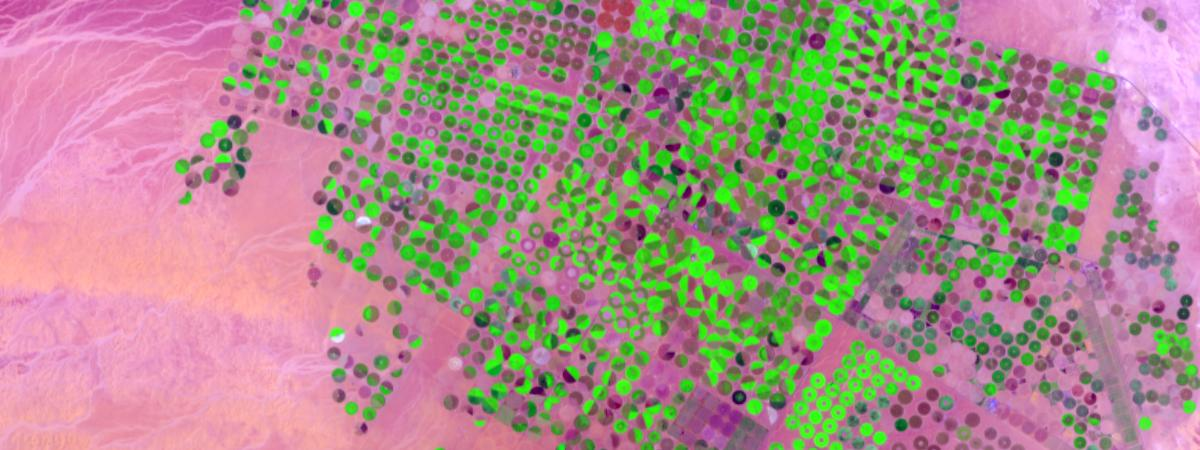

In [66]:
landsat

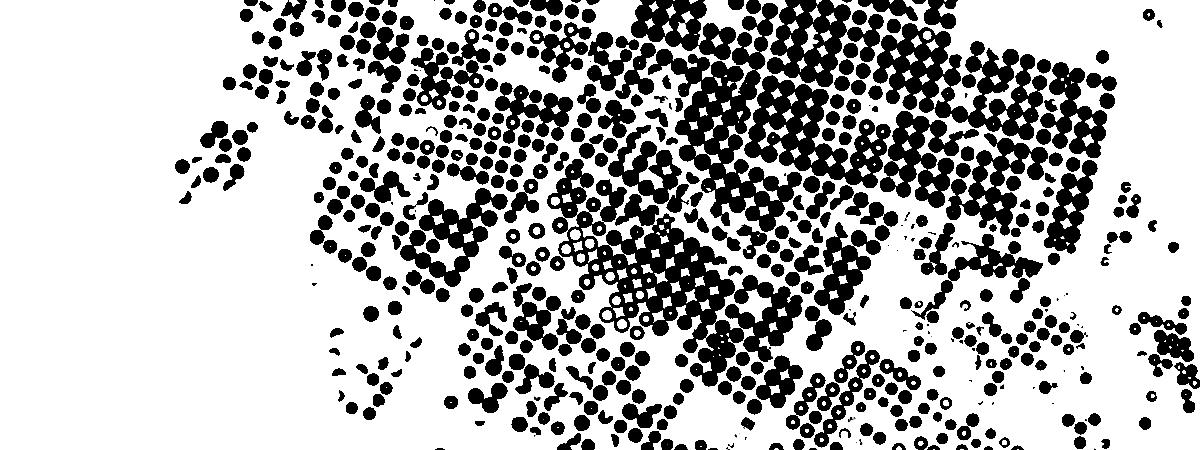

In [67]:
preprocessed = stretch(ndvi(landsat), stretch_type='PercentClip', min_percent=30, max_percent=70, dra=True)
preprocessed

In [68]:
def count_farms():
    from skimage import feature, color
    import numpy as np
    from scipy.signal import convolve2d
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = preprocessed.export_image(size=[1200, 450],
        export_format='jpeg', save_folder='c:\\xc', save_file='saudiarabia.jpg', f='image')
    
    img = mpimg.imread('c:\\xc\\saudiarabia.jpg')
    
    bw = img.mean(axis=2)
    fig=plt.figure(figsize = (15,15))
    ax=fig.add_subplot(1,1,1)

    blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(-bw, 
                                                            min_sigma=4, 
                                                            max_sigma=8,
                                                            threshold=0.1,
                                                            overlap=0.6)]

    blobs_dog = set(blobs_dog)

    img_blobs = color.gray2rgb(img)
    for blob in blobs_dog:
        y, x, r = blob
        c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.imshow(img_blobs)
    plt.title('Center Pivot Farms')

    plt.show()
    print('Number of center pivot farms detected: ' + str(len(blobs_dog)))

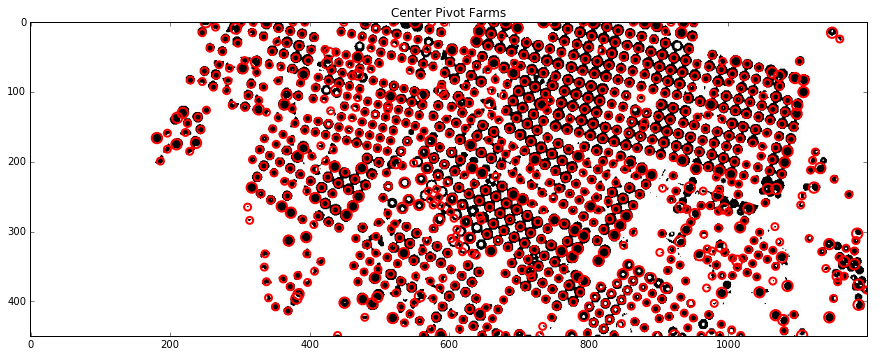

Number of center pivot farms detected: 1002


In [69]:
count_farms()

# IBM Watson integration
### Inspection and maintenance of power insulators

In [71]:
from IPython.display import Image

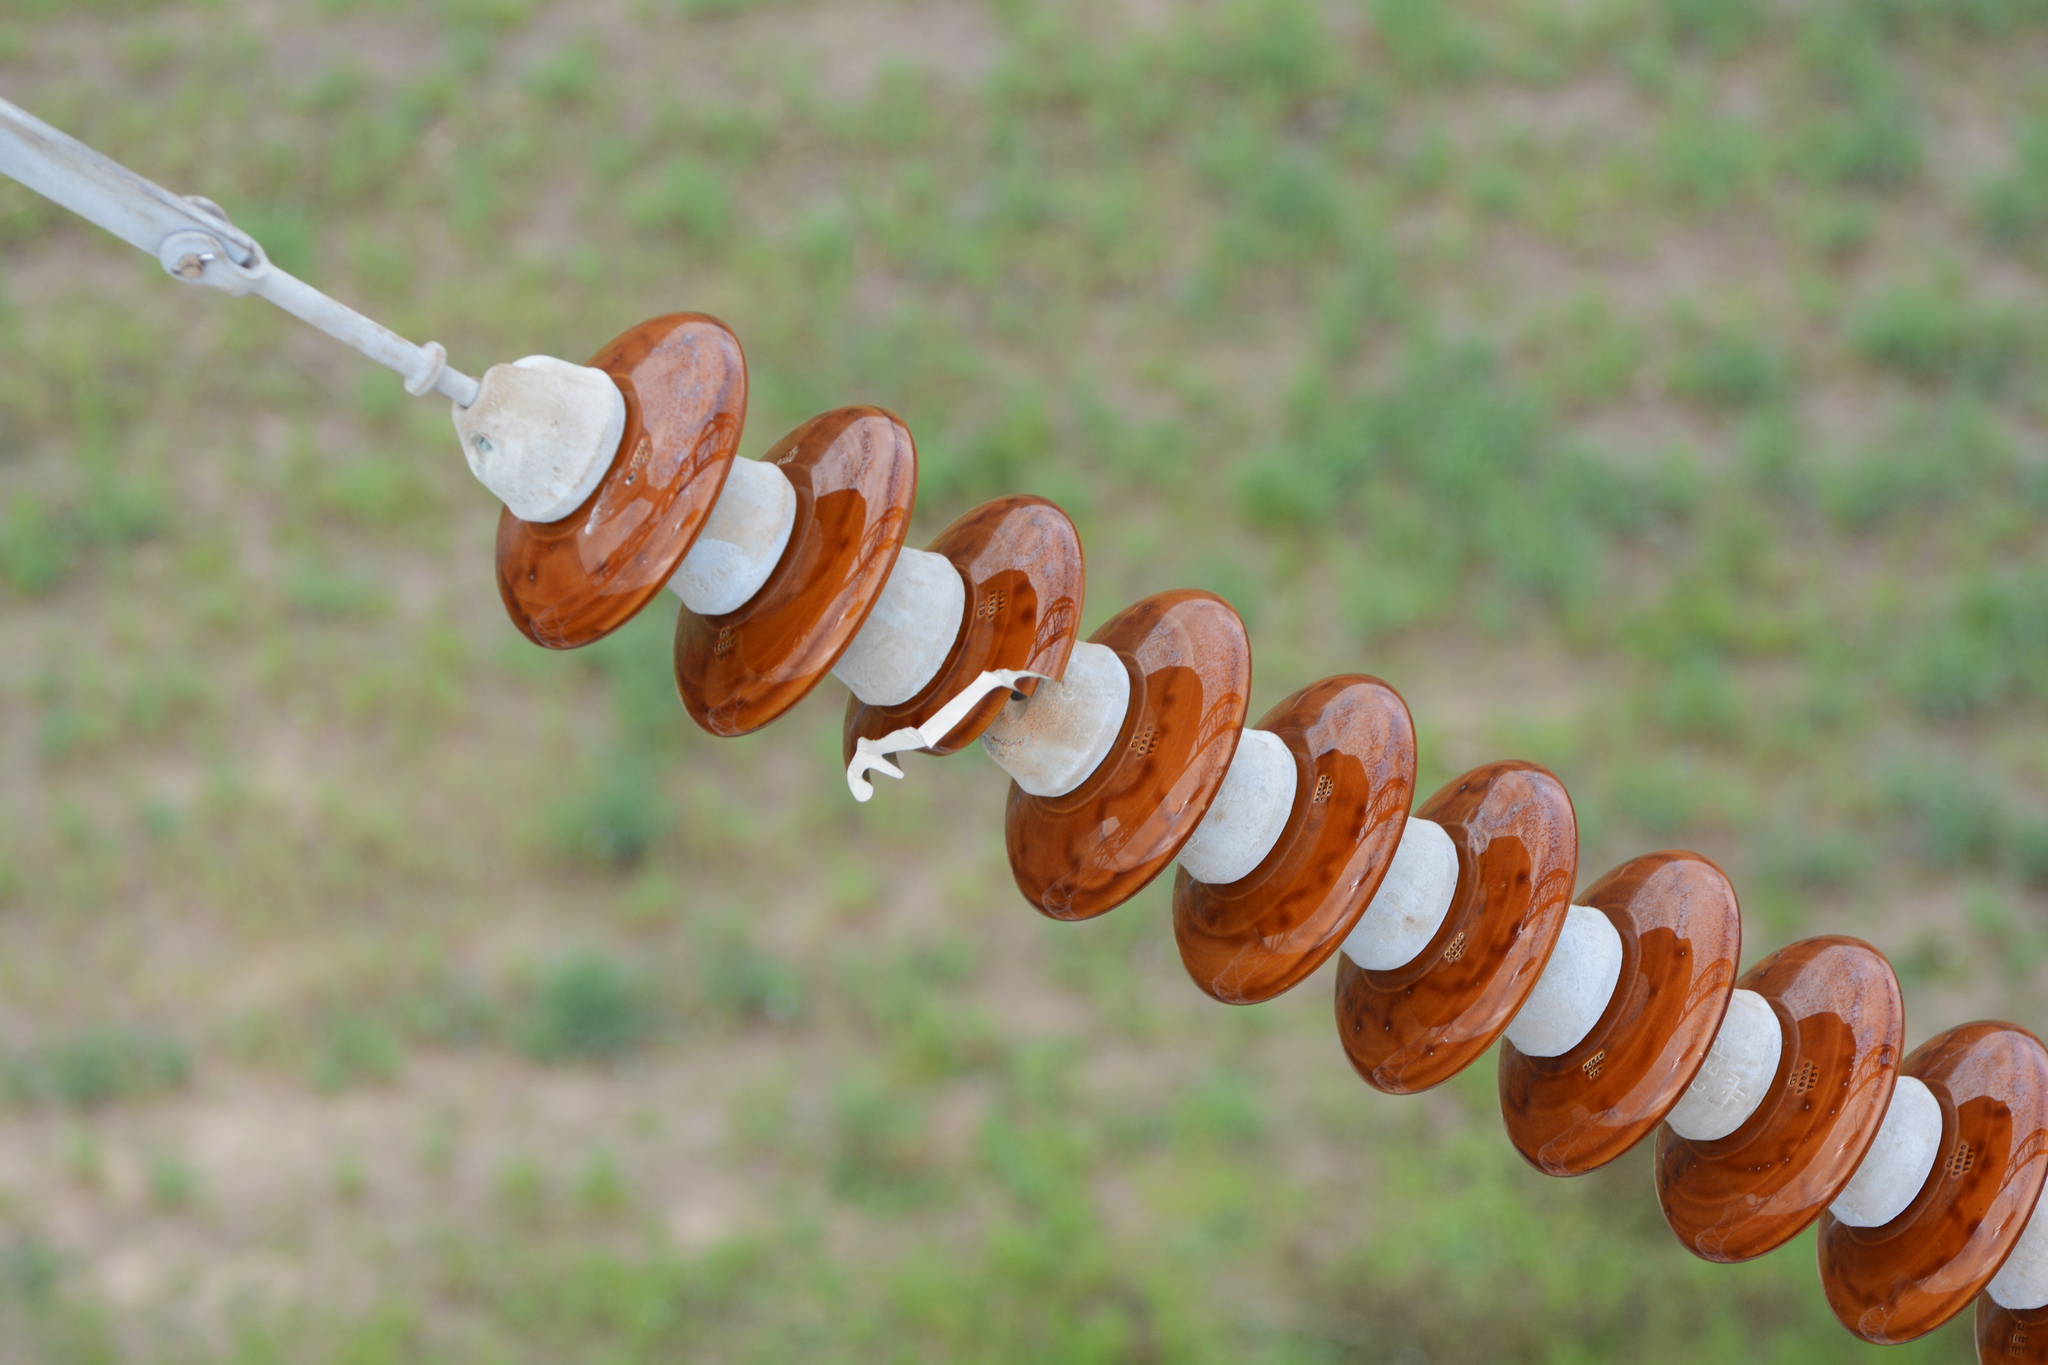

In [89]:
img = r'C:\xc\Presentations\GeoPython\Watson\insulators\150362.JPG'
Image(img, width="600")

In [85]:
import json
import datetime
import pandas as pd
from os import listdir
from os.path import isfile, join
from IPython.display import Image

from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.features.use_proximity import plan_routes
from arcgis.features.summarize_data import join_features

## Using IBM Watson Image Classifier

In [117]:

from watson_developer_cloud import VisualRecognitionV3

visual_recognition = VisualRecognitionV3('2016-05-20', api_key='f135ee67e833d45e90e2304608e0376b5a148688')

def is_broken(filepath):
    with open(filepath, 'rb') as images_file:
        car_results = visual_recognition.classify(images_file=images_file,
                                                  threshold=0.1,
                                                  classifier_ids=['BrokenInsulators'])
        print(car_results)
        classes = car_results['images'][0]['classifiers'][0]['classes']
        for cls in classes:
            if cls['class'] == 'broken':
                if float(cls['score']) > 0.5:
                    return True
                
        return False

In [100]:
import piexif
def get_location(filename):

    exif_dict = piexif.load(filename)

    for tag in exif_dict['GPS']:
        name = piexif.TAGS['GPS'][tag]["name"]
        value = exif_dict['GPS'][tag]

        if name == 'GPSLatitudeRef':
            gps_latitude_ref = value
        elif name == 'GPSLongitudeRef':
            gps_longitude_ref = value
        elif name == 'GPSLatitude':
            gps_latitude = value
        elif name == 'GPSLongitude':
            gps_longitude = value
            
    lat = _convert_to_degress(gps_latitude)
    if gps_latitude_ref != b'N':
        lat = 0 - lat

    lon = _convert_to_degress(gps_longitude)
    if gps_longitude_ref != b'E':
        lon = 0 - lon
        
    return lon, lat

def _convert_to_degress(val):
    """
    Helper function to convert the GPS coordinates stored in the EXIF to degress in float format
    :param value:
    :type value: exifread.utils.Ratio
    :rtype: float
    """
    d = float(val[0][0]) / float(val[0][1])
    m = float(val[1][0]) / float(val[1][1])
    s = float(val[2][0]) / float(val[2][1])
    
    return d + (m / 60.0) + (s / 3600.0)

In [115]:
get_location(img)

(-123.05857389997222, 44.698829929999995)

In [118]:
is_broken(img)

{'images': [{'image': '', 'classifiers': [{'name': 'BrokenInsulators', 'classifier_id': 'BrokenInsulators_1382670166', 'classes': [{'score': 0.567984, 'class': 'broken'}]}]}], 'images_processed': 1, 'custom_classes': 1}


True

## Integration workflow

In [79]:
locations = []
path = r'C:\xc\Presentations\GeoPython\Watson\insulators'

# find locations of broken insulators
for file in listdir(path):
    filepath = path + '\\' + file
    if is_broken(filepath):
        locations.append(get_location(filepath))   

# import into ArcGIS as a layer
df = pd.DataFrame.from_records(locations)
df.columns = ['x', 'y']
broken_insulators = gis.content.import_data(df)

In [104]:
locations = []
path = r'C:\xc\Presentations\GeoPython\Watson\insulators'

# find locations of broken insulators
for file in listdir(path):
    filepath = path + '\\' + file
    if True: #is_broken(filepath):
        locations.append(get_location(filepath))   

# import into ArcGIS as a layer
df = pd.DataFrame.from_records(locations)
df.columns = ['x', 'y']
broken_insulators = gis.content.import_data(df)

In [105]:
arcgis.env.active_gis = gis
start_location = geocode('2715 Tepper Ln NE, Keizer, OR 97303')[0]
start_time = datetime.datetime(2017, 5, 31, 9, 0)

In [106]:
# get layer of transmission towers
towers = gis.content.search('BPA_TransmissionStructures', 'Feature Layer', outside_org=True)[0]

# find transmission towers near image locations
destinations = join_features(towers, broken_insulators, 
                             "withindistance", 0.1, "Miles")

# plan and sequence routes for maintenance
routes = plan_routes(destinations, 2, 15, 
                     start_time, start_location, stop_service_time=30)

Input field [OID] was not mapped to a field in the network analysis class "Orders".
Input field [OID] was not mapped to a field in the network analysis class "Depots".


In [107]:
def show_map():
    webmap = gis.content.get('4a24e5829d174732bc04f16de83eaffe')
    powermap = gis.map(webmap)
    display(powermap)
    powermap.height ='600px' 
    powermap.draw(start_location, {"title": "Start location", "content": "Bonneville Power Administration"})
    return powermap

In [109]:
powermap = show_map()

In [110]:
powermap.basemap = 'dark-gray'

powermap.add_layer(broken_insulators)
powermap.add_layer(routes['routes_layer'])
powermap.add_layer(routes['assigned_stops_layer'])

In [114]:
powermap.zoom = 9

# Try it out!


* install: conda install -c esri arcgis

* github repo: https://github.com/esri/arcgis-python-api

* website: https://developers.arcgis.com/python

We're hiring :)

<center>
 <img src="images/ScienceOfWhere.PNG"/>
</center>